In [ ]:
import cv2
import numpy as np

# Load images
img_src = cv2.imread('source_image.jpg')
img_target = cv2.imread('target_image.jpg')

# Resize for visualization (optional)
img_src = cv2.resize(img_src, (400, 400))
img_target = cv2.resize(img_target, (400, 400))

# Define corresponding points (manually or detected)
src_points = np.float32([[50, 50], [200, 50], [50, 200]])  # Points in the source image
dst_points = np.float32([[10, 100], [200, 50], [100, 250]])  # Corresponding points in the target image

# Compute the affine transformation matrix
affine_matrix = cv2.getAffineTransform(src_points, dst_points)

# Get dimensions of the target image
rows, cols, _ = img_target.shape

# Apply the affine transformation
aligned_img = cv2.warpAffine(img_src, affine_matrix, (cols, rows))

# Display the images
cv2.imshow("Source Image", img_src)
cv2.imshow("Target Image", img_target)
cv2.imshow("Aligned Image", aligned_img)

cv2.waitKey(0)
cv2.destroyAllWindows()


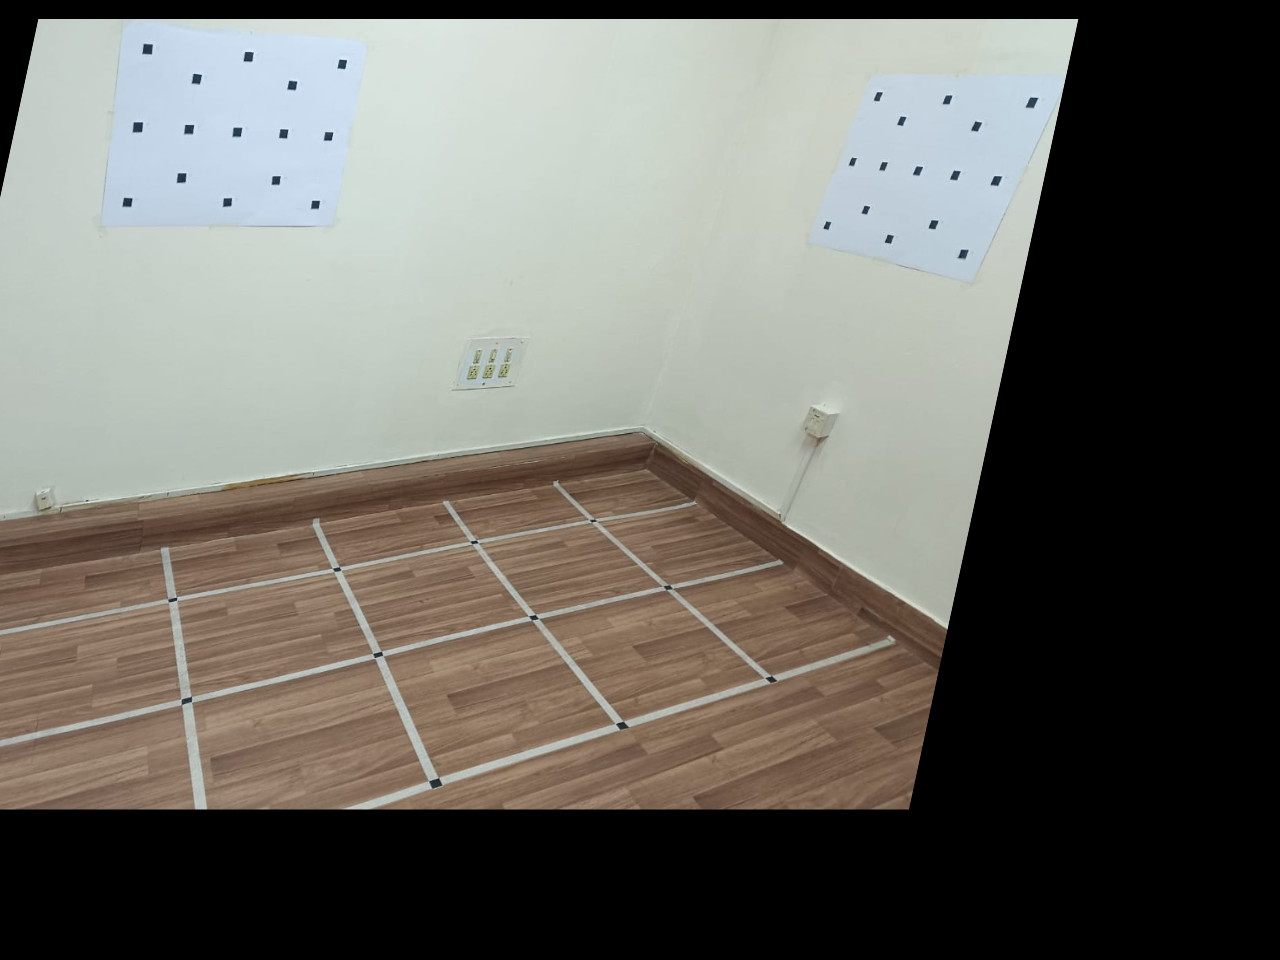

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow

img_src = cv2.imread('/content/lab_img1.jpg')
img_target = cv2.imread('/content/lab_img2.jpg')
src_points = np.float32([[50, 50], [210, 50], [50, 220]])
dst_points = np.float32([[70, 60], [200, 60], [40, 200]])

affine_matrix = cv2.getAffineTransform(src_points, dst_points)
aligned_img = cv2.warpAffine(img_src, affine_matrix, img_target.shape[1::-1])

cv2_imshow(aligned_img) # Use cv2_imshow instead of cv2.imshow

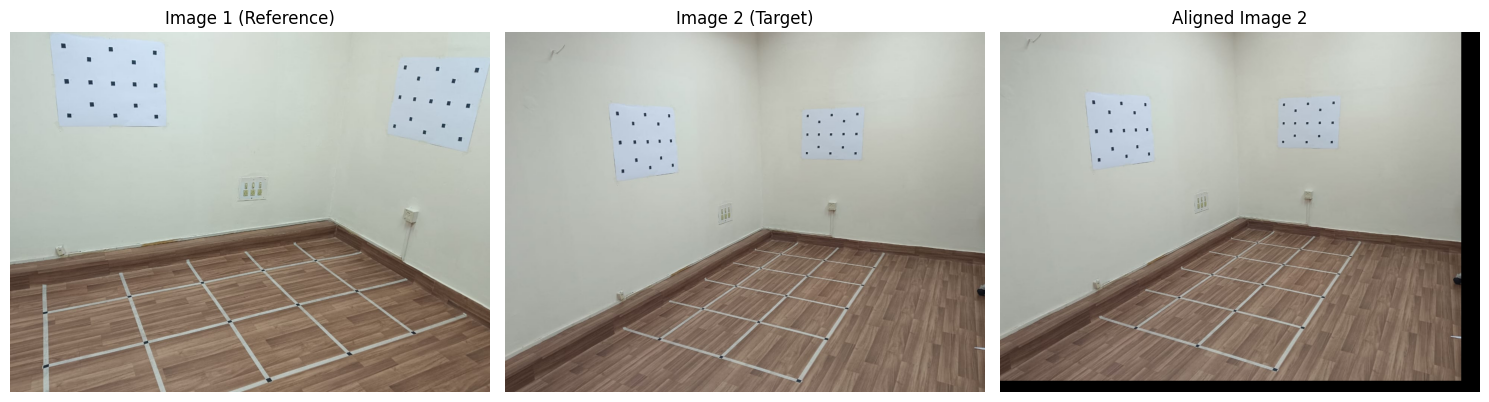

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images - **Corrected Paths**
img1_path = '/content/lab_img1.jpg'  # Reference image - Added '/'
img2_path = '/content/lab_img2.jpg'  # Target image   - Added '/'

img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# Check if images were loaded successfully
if img1 is None:
    print(f"Error: Could not load image from {img1_path}")
    exit()  # or handle the error appropriately
if img2 is None:
    print(f"Error: Could not load image from {img2_path}")
    exit()  # or handle the error appropriately

# Convert images to grayscale for point selection (if needed)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Define corresponding points manually (for simplicity, approximate coordinates)
# Points selected based on visual inspection
pts1 = np.float32([[200, 200], [400, 200], [200, 400]])  # Points in img1 (reference)
pts2 = np.float32([[250, 230], [450, 230], [250, 430]])  # Points in img2 (target)

# Compute affine transformation matrix
affine_matrix = cv2.getAffineTransform(pts2, pts1)

# Apply affine transformation
rows, cols, ch = img1.shape
aligned_img2 = cv2.warpAffine(img2, affine_matrix, (cols, rows))

# Visualize comparison
plt.figure(figsize=(15, 10))

# Original Image 1 (Reference)
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Image 1 (Reference)')
plt.axis('off')

# Original Image 2 (Target)
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Image 2 (Target)')
plt.axis('off')

# Transformed Image 2
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(aligned_img2, cv2.COLOR_BGR2RGB))
plt.title('Aligned Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()


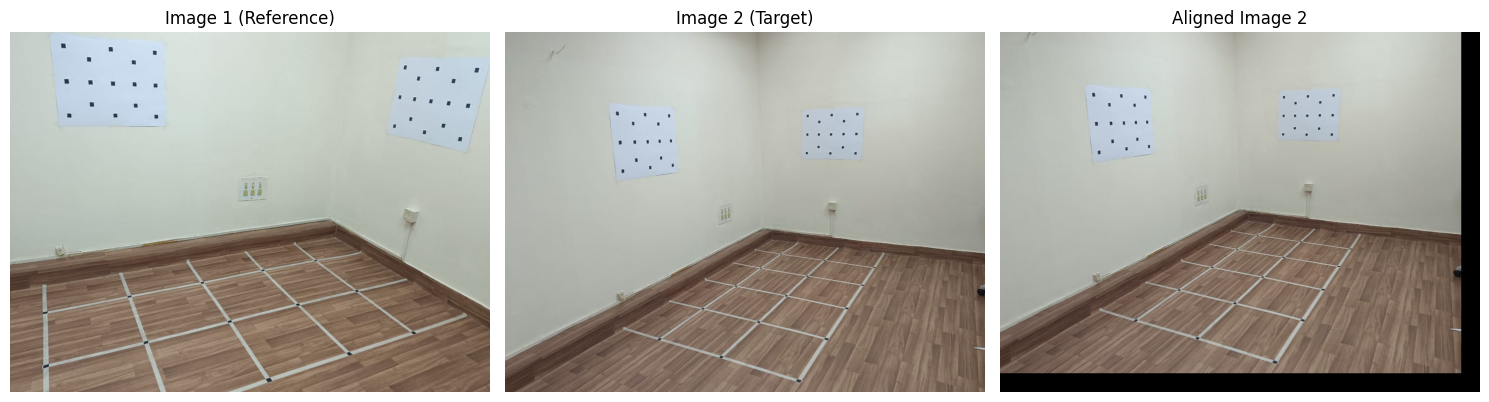

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
img1_path = '/content/lab_img1.jpg'  # Reference image
img2_path = '/content/lab_img2.jpg'  # Target image

img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# Check if images were loaded successfully
if img1 is None:
    print(f"Error: Could not load image from {img1_path}")
    exit()
if img2 is None:
    print(f"Error: Could not load image from {img2_path}")
    exit()

# Define corresponding points based on grid corners
# Points are selected manually based on visual inspection
pts1 = np.float32([[300, 300], [600, 300], [300, 600]])  # Grid corners in img1 (reference)
pts2 = np.float32([[350, 350], [650, 350], [350, 650]])  # Corresponding grid corners in img2 (target)

# Compute affine transformation matrix
affine_matrix = cv2.getAffineTransform(pts2, pts1)

# Apply affine transformation
rows, cols, ch = img1.shape
aligned_img2 = cv2.warpAffine(img2, affine_matrix, (cols, rows))

# Visualize comparison
plt.figure(figsize=(15, 10))

# Original Image 1 (Reference)
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Image 1 (Reference)')
plt.axis('off')

# Original Image 2 (Target)
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Image 2 (Target)')
plt.axis('off')

# Transformed Image 2
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(aligned_img2, cv2.COLOR_BGR2RGB))
plt.title('Aligned Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()
